# TS3

<img src="../img/TS3.png">

Buscamos los polos y ceros. Para ello voy a noramlizar epsilon ($\xi^2 = 1$). Estamos normalizando respecto a \omega = \omega_B$

In [9]:
from sympy import  *
import numpy as np
from sympy.abc import s
from IPython.display import display, Math
from splane import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
from scipy import signal

coeffs_den=[1,0,0,0,0,0,0,0,1]

root = np.roots(coeffs_den)

display(root)

array([-0.92387953+0.38268343j, -0.92387953-0.38268343j,
       -0.38268343+0.92387953j, -0.38268343-0.92387953j,
        0.38268343+0.92387953j,  0.38268343-0.92387953j,
        0.92387953+0.38268343j,  0.92387953-0.38268343j])

Ahora debemos hallar $T(jw)$. Para eso vuelvo a subdividir  $T(jw)$ en  $T(jw) = T_1(jw)*T_2(jw)$

Para hallar $T_1(jw)$ y $T_2(jw)$ debemos analizar los polos. Sabemos que en un Butter. los polos estan ubicados en la circunferencia unitaria y separados $\frac{\pi}{n} = \frac{\pi}{4}$ y al ser n par el primer polo esta en $\frac{\pi}{2n} = \frac{\pi}{8}$. Al estar normalizado respecto a $\Omega_\omega = \omega_B$, el $\omega_0 = 1$.

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

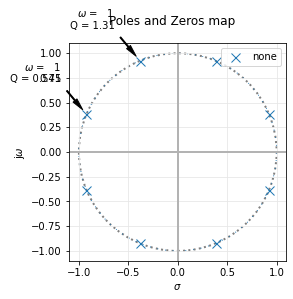

In [4]:
my_tf = TransferFunction( [1], coeffs_den )

pzmap(my_tf, 4) #S plane pole/zero plot      

Finalmente obtengo las transferencias. El $Q = \frac{1}{2cos(\psi)}$

\begin{equation}
T_1(s) = \frac{1}{s^2+s\frac{1}{1.3065}+1}.
\end{equation}

\begin{equation}
T_2(s) = \frac{1}{s^2+s\frac{1}{0.5412}+1}.
\end{equation}

Debo transformar en frecuencia para asi obtener mi transferencia de pasa-altos:

$K(s)= \frac{1}{s}$. Reemplazamos y obtenemos:

\begin{equation}
T_1(s) = \frac{s^2}{s^2+s\frac{1}{1.3065}+1}.
\end{equation}

\begin{equation}
T_2(s) = \frac{s^2}{s^2+s\frac{1}{0.5412}+1}.
\end{equation}

Lo siguiente es desnormailizar en frecuencia. Al estar en la transferencia de un pasa-altos, el $\Omega_\omega = \omega_B = \omega_{P_{HP}}\xi^\frac{1}{n}$

$\xi^\frac{1}{n} = {0.2586}^{0.25} = 0.84$ y $\omega_{P_{HP}}=2\pi.3500$

Finalmente $\omega_B = 5880\pi$ y mis transferencias quedan:

\begin{equation}
T_1(s) = \frac{s^2}{s^2+s\frac{5880\pi}{1.3065}+5880\pi^2}.
\end{equation}

\begin{equation}
T_2(s) = \frac{s^2}{s^2+s\frac{5880\pi}{0.5412}+5880\pi^2}.
\end{equation}

(4, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

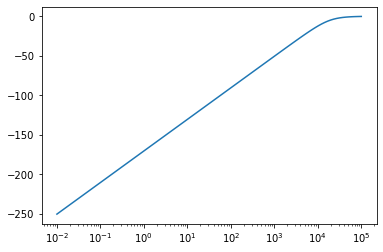

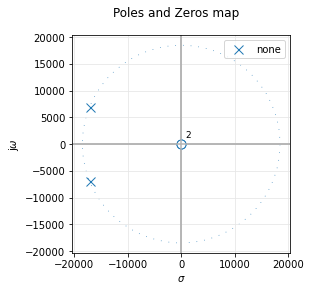

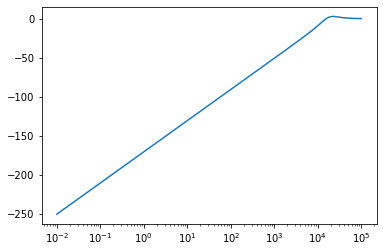

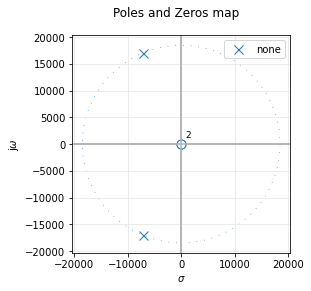

In [11]:
w0 = 5880*3.14
q1 = 0.54
q2 = 1.306

my_tf = TransferFunction( [1,0,0] ,[1, w0/q1, w0**2] )

w, mag, phase = signal.bode(my_tf)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot

pzmap(my_tf) #S plane pole/zero plot

my_tf = TransferFunction( [1,0,0] ,[1, w0/q2, w0**2] )

w, mag, phase = signal.bode(my_tf)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot

pzmap(my_tf) #S plane pole/zero plot




Ahora solo nos queda pasar al circuito. Para ello usamos las siguientes ecuaciones:

$\omega_0^2 = \frac{1}{LC}$ y $\frac{\omega_0}{Q}= \frac{R}{L}$

Adoptamos un valor, $R=1K\Omega$ y operando nos queda:

$R_1=1K\Omega, L_1=0.0292H, C_1=100.3nF$

$R_2=1K\Omega, L_2=0.0703H, C_2=41.6nF$

Y ahora verificamos que los requisitos de la plantilla se cumplan:

<img src="../img/fhp_w3500.png">

Si hacemos la inversa de la transferencia obtenemos $\alpha(\omega)$ y podremos ver mas en detalle que se cumplen los requisitos del filtro:

<img src="../img/alpha_fpa_desn.png">

Y vemos que si se cumplen los requisitos.

Si ahora usamos una norma de impedancia $\Omega_Z$ = 1K, los valores de los componentes seran:

$R_{N}=\frac{R}{\Omega_Z}, L_N = \frac{R_N.Q}{\omega_o}, C_N=\frac{1}{R_N.Q.\omega_o}$

Enonces me queda:

$R_1=1, L_1=29.232\mu H, C_1=100.3\mu F$

$R_2=1, L_2=70.3 \mu H, C_2=41.6\mu F$

<img src="../img/pasa_altos_ord4_norm_z.png">

Se puede ver que su transferencia es coorecta.

Como ultimo paso, activaremos las bobinas utilizando OPAMPS, mas especificamente usando 2 GIC.

El circuito es el siguiente:

<img src="../img/pasa_altos_ord4_lactivo.png">

Y su respuesta en frecuencia es:

<img src="../img/transf_fpa_lactivo.png">


NOTA:
Para f < 1kHz la atenuacion es la especificada por la plantilla. Pero para f > 3,5kHz vemos que la ganancia no es constante y cada vez hay mas atenuacion.